In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the dataset
try:
    df = pd.read_csv('districtwise-sll-crimes-2017-onwards.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    exit()

# Initial Inspection
print("Initial DataFrame Info:")
df.info()
print("\nFirst 5 rows of the raw data:")
print(df.head())

# --- Data Cleaning and Preparation ---

# The last column has empty strings which pandas may not recognize as NaN.
# We will replace any non-numeric placeholders if necessary and fill NaNs.
# First, identify all columns that are meant to be numeric (crime counts)
# These are all columns from 'dowry_prohibition' onwards.
crime_columns = df.columns[7:]

# Convert columns to numeric, coercing errors to NaN. This handles empty strings and other non-numeric values.
for col in crime_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with 0, assuming missing data means zero reported cases.
df[crime_columns] = df[crime_columns].fillna(0)
print("\nNaN values filled with 0.")

# Convert crime count columns from float to integer
df[crime_columns] = df[crime_columns].astype(int)
print("Crime count columns converted to integer type.")

# Feature Engineering: Create a 'total_sll_crimes' column
df['total_sll_crimes'] = df[crime_columns].sum(axis=1)
print("Engineered 'total_sll_crimes' feature.")

# Final Inspection
print("\nCleaned DataFrame Info:")
df.info()
print("\nFirst 5 rows of the cleaned data with total crimes:")
print(df[['year', 'state_name', 'district_name', 'total_sll_crimes']].head())

# Display descriptive statistics for the new total column
print("\nDescriptive Statistics for 'total_sll_crimes':")
print(df['total_sll_crimes'].describe())

Dataset loaded successfully.
Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 79 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      5321 non-null   int64  
 1   year                                                    5321 non-null   int64  
 2   state_name                                              5321 non-null   object 
 3   state_code                                              5321 non-null   int64  
 4   district_name                                           5321 non-null   object 
 5   district_code                                           5321 non-null   int64  
 6   registration_circles                                    5321 non-null   object 
 7   dowry_prohibition                                       5321 non-null 

C:\Users\acer\AppData\Local\Temp\ipykernel_20312\1539647691.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')


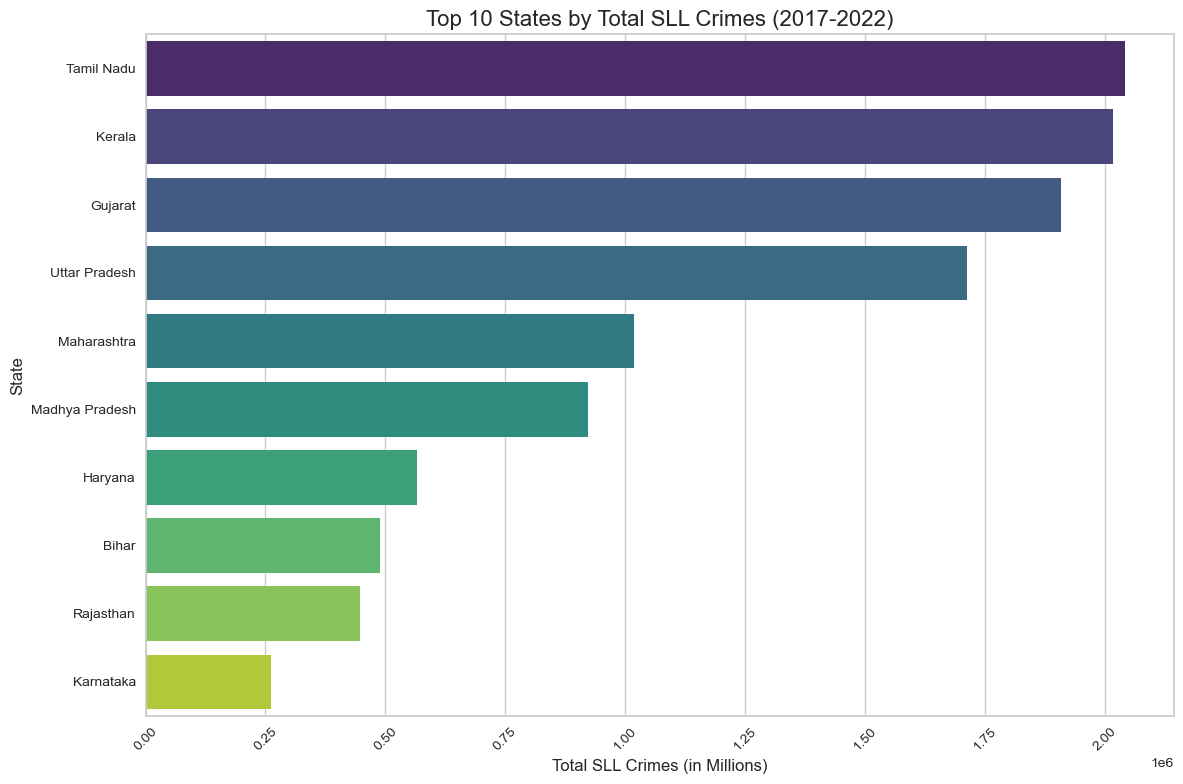

Top 10 States by Total SLL Crimes (2017-2022):
state_name
Tamil Nadu        2041719
Kerala            2016917
Gujarat           1909162
Uttar Pradesh     1713127
Maharashtra       1018148
Madhya Pradesh     922499
Haryana            565166
Bihar              488207
Rajasthan          447187
Karnataka          261097
Name: total_sll_crimes, dtype: int64


In [3]:
# --- State-Level Analysis ---

# Aggregate total SLL crimes by state and year
state_yearly_crimes = df.groupby(['state_name', 'year'])['total_sll_crimes'].sum().reset_index()

# Aggregate total SLL crimes by state over all years for ranking
state_total_crimes = df.groupby('state_name')['total_sll_crimes'].sum().sort_values(ascending=False)

# Get the top 10 states
top_10_states = state_total_crimes.head(10)

# Visualization: Bar chart for Top 10 States
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')
plt.title('Top 10 States by Total SLL Crimes (2017-2022)', fontsize=16)
plt.xlabel('Total SLL Crimes (in Millions)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 States by Total SLL Crimes (2017-2022):")
print(top_10_states)

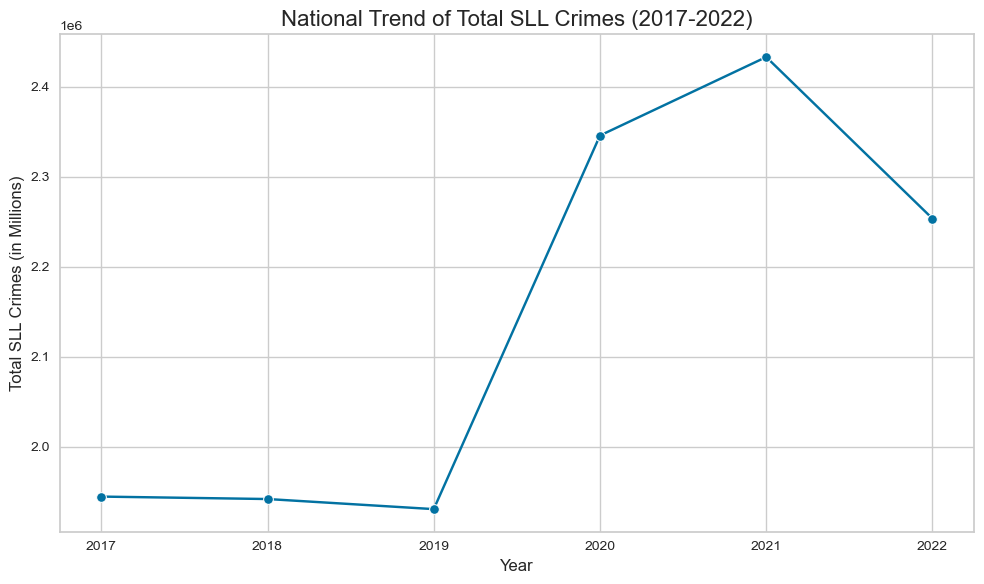

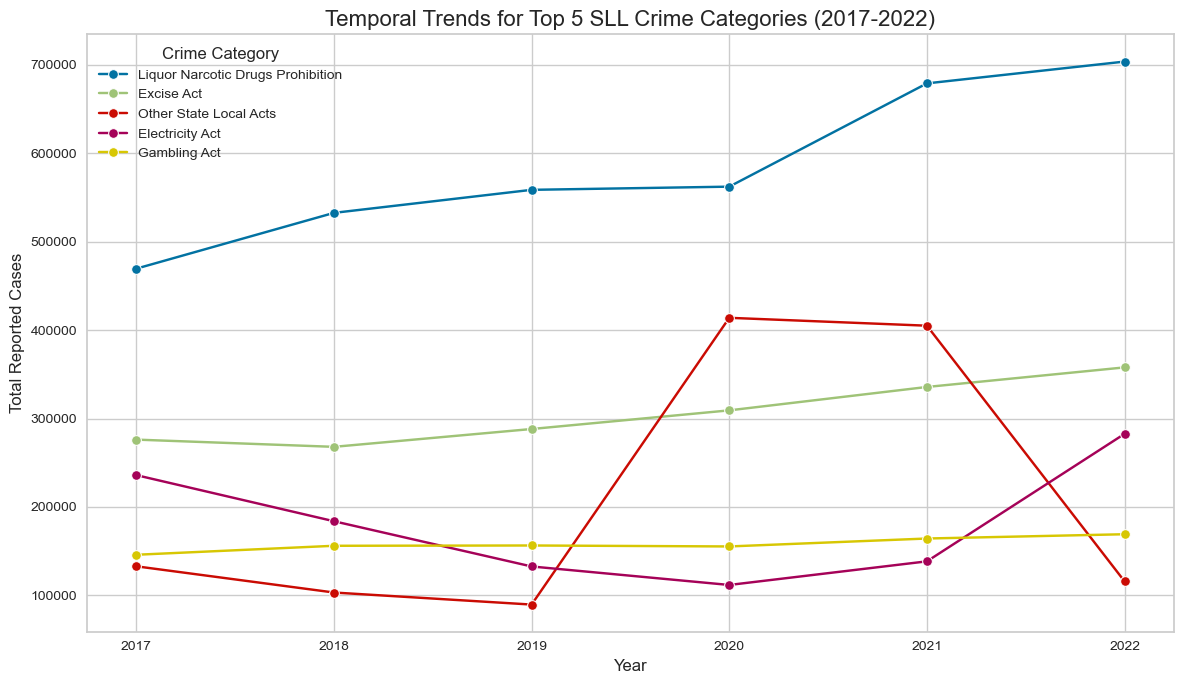

In [4]:
# --- Temporal Trend Analysis ---

# National Trend
national_trend = df.groupby('year')['total_sll_crimes'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=national_trend.index, y=national_trend.values, marker='o')
plt.title('National Trend of Total SLL Crimes (2017-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total SLL Crimes (in Millions)', fontsize=12)
plt.grid(True)
plt.xticks(national_trend.index)
plt.tight_layout()
plt.show()

# Trend for Top 5 Crime Categories
top_5_crime_cols = df[crime_columns].sum().nlargest(5).index
crime_trends = df.groupby('year')[top_5_crime_cols].sum()

plt.figure(figsize=(12, 7))
for crime in crime_trends.columns:
    sns.lineplot(x=crime_trends.index, y=crime_trends[crime], marker='o', label=crime.replace('_', ' ').title())
plt.title('Temporal Trends for Top 5 SLL Crime Categories (2017-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Reported Cases', fontsize=12)
plt.xticks(crime_trends.index)
plt.legend(title='Crime Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# --- Correlation Analysis ---

# Select the top 25 most frequent crime columns for a cleaner correlation matrix
top_crime_columns = df[crime_columns].sum().nlargest(25).index.tolist()
correlation_data = df[top_crime_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display a portion of the correlation matrix for reference
print("Sample of the Correlation Matrix:")
print(correlation_matrix.head())

Sample of the Correlation Matrix:
                                   liquor_narcotic_drugs_prohibition  \
liquor_narcotic_drugs_prohibition                           1.000000   
excise_act                                                 -0.165331   
other_state_local_acts                                      0.106534   
electricity_act                                            -0.018951   
gambling_act                                                0.261083   

                                   excise_act  other_state_local_acts  \
liquor_narcotic_drugs_prohibition   -0.165331                0.106534   
excise_act                           1.000000               -0.050463   
other_state_local_acts              -0.050463                1.000000   
electricity_act                      0.019243               -0.007763   
gambling_act                         0.386077               -0.003118   

                                   electricity_act  gambling_act  \
liquor_narcotic_drugs_proh

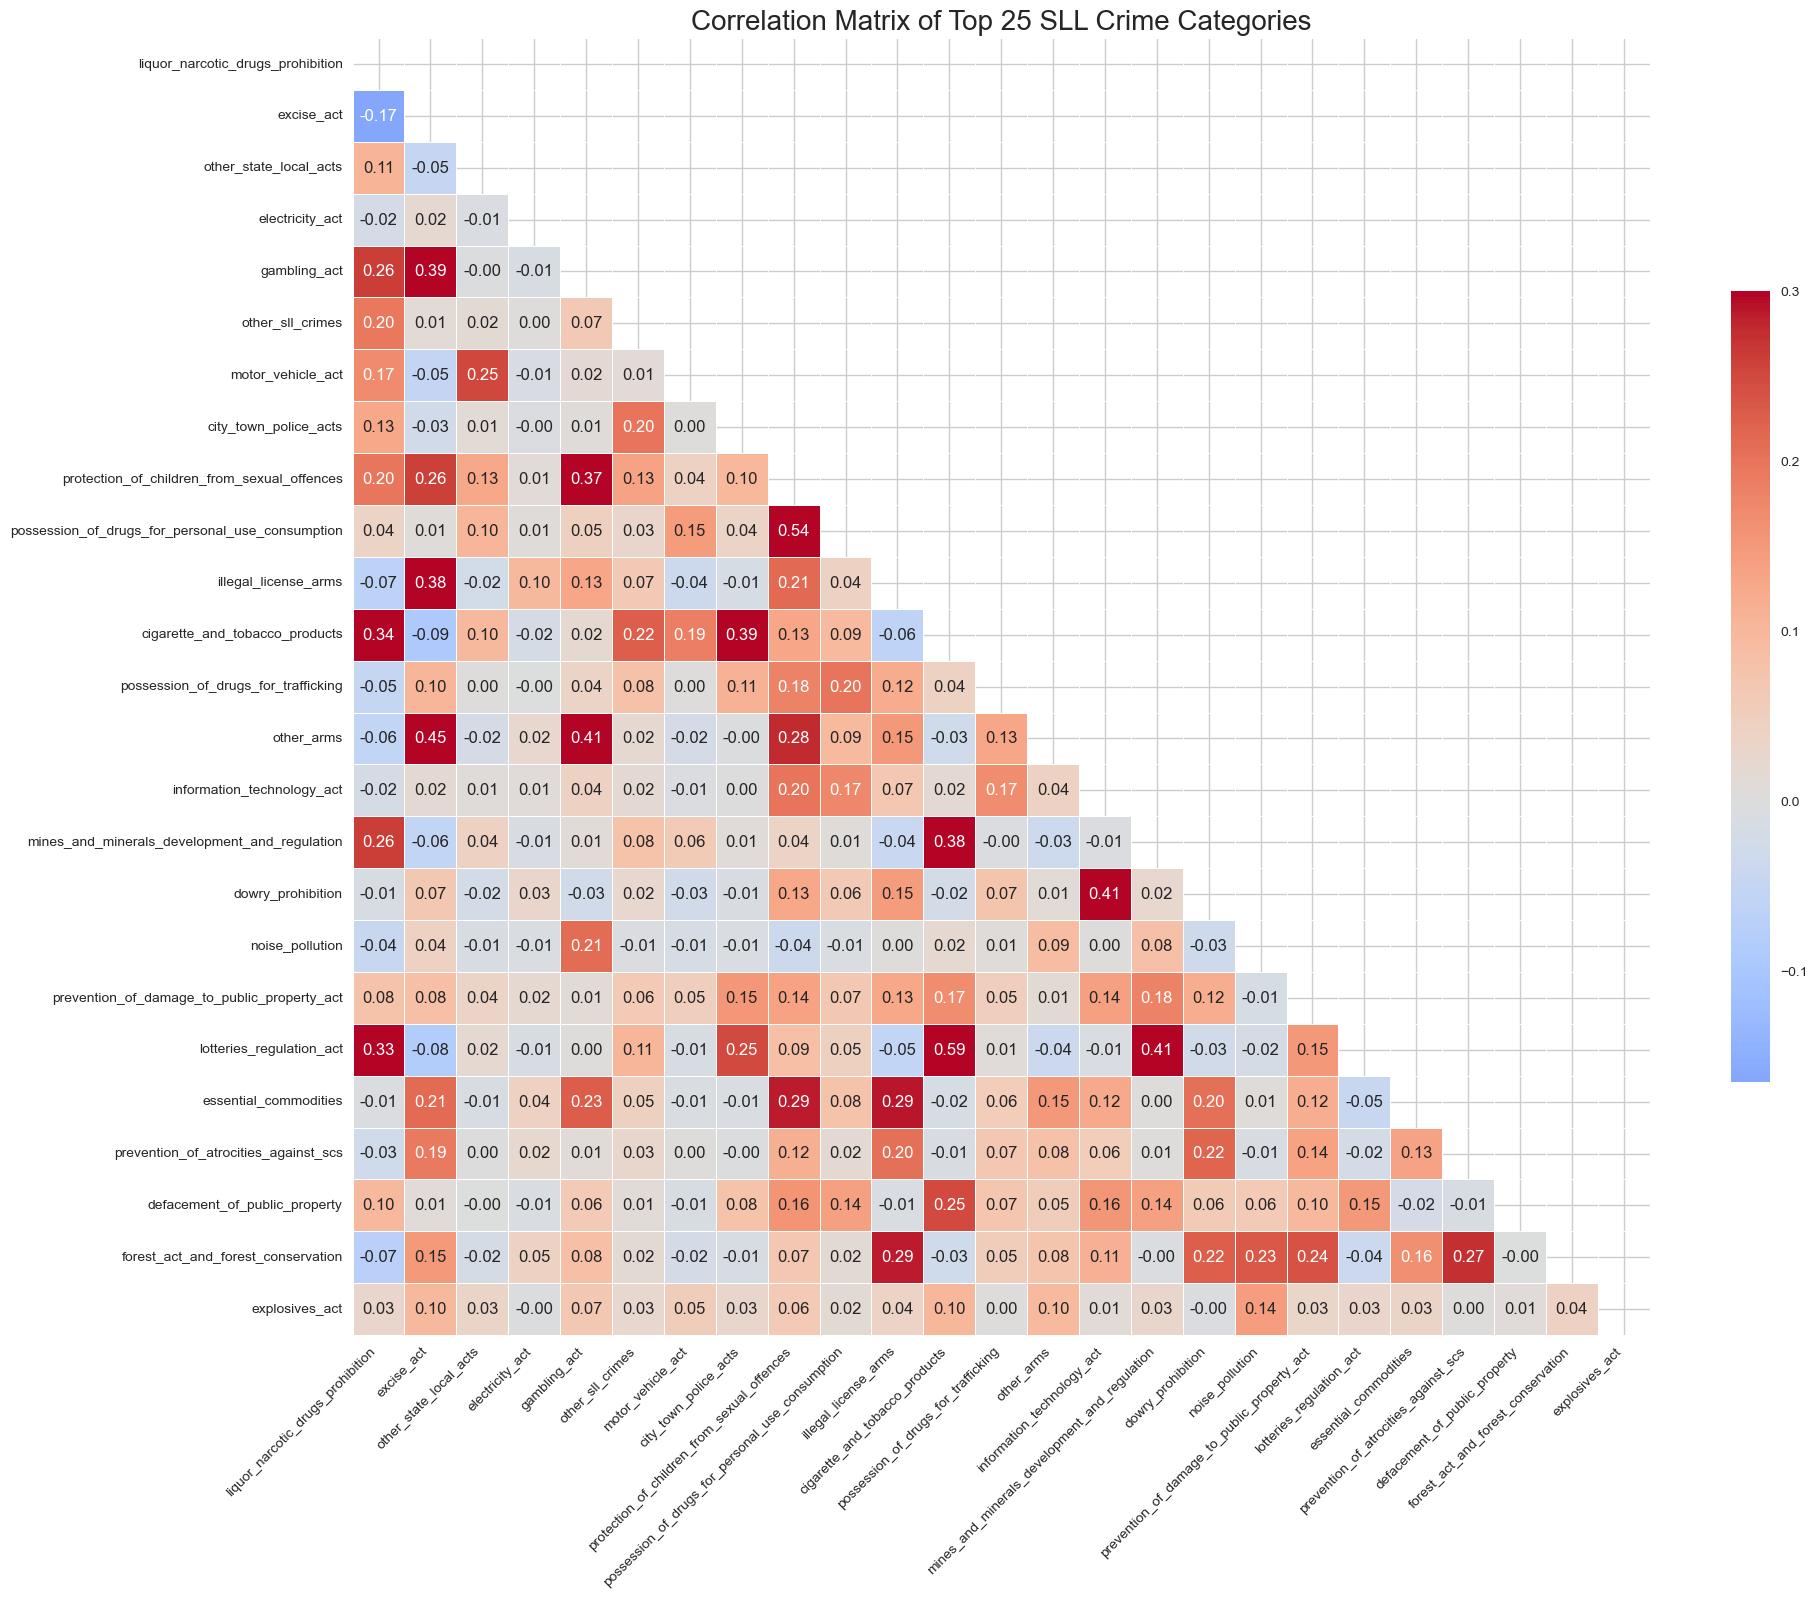

In [6]:
# --- Heatmap Visualization ---

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Top 25 SLL Crime Categories', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# --- Data Preparation for Clustering ---

# Aggregate data at the district level, summing crimes over all years
district_profile = df.groupby(['state_name', 'district_name'])[top_crime_columns].sum()

# Reset index to work with district names later
district_profile_reset = district_profile.reset_index()

# Select only the numeric crime data for scaling and clustering
X = district_profile[top_crime_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared for clustering. Shape of scaled data:", X_scaled.shape)


Data prepared for clustering. Shape of scaled data: (759, 25)


Finding optimal k using the Elbow Method...


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

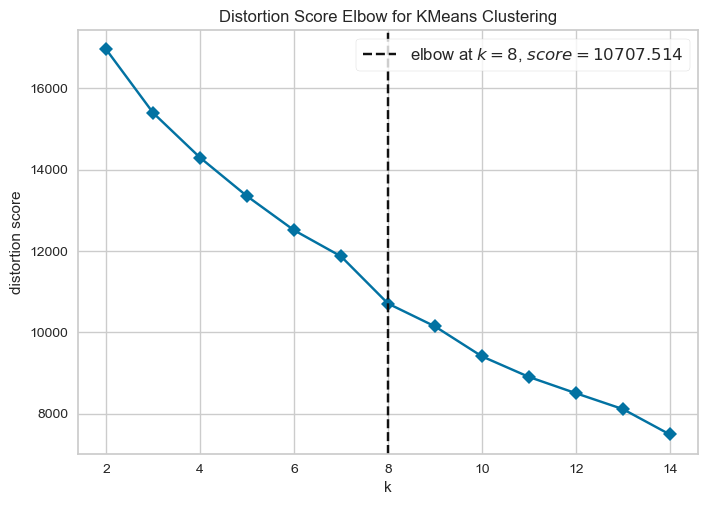

The optimal number of clusters identified by the Elbow Method is: 8


In [8]:
# --- Elbow Method for Optimal k ---

# Use the KElbowVisualizer to find the optimal number of clusters
# This visualizer automates the process of iterating through k and plotting inertia
print("Finding optimal k using the Elbow Method...")
model = KMeans(init='k-means++', n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 15), metric='distortion', timings=False)

# Fit the data to the visualizer
visualizer.fit(X_scaled)

# Finalize and render the figure
visualizer.show()

# Store the optimal k found by the visualizer
optimal_k = visualizer.elbow_value_
print(f"The optimal number of clusters identified by the Elbow Method is: {optimal_k}")

In [9]:
# --- K-Means Clustering and Profiling ---

# Assuming optimal_k is found from the elbow plot (e.g., 5)
if optimal_k is None:
    optimal_k = 5 # Set a default if visualizer fails in a non-interactive environment

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the district profile DataFrame
district_profile_reset['cluster'] = clusters

# Analyze the clusters by calculating the mean of original (unscaled) values
cluster_profile = district_profile_reset.groupby('cluster')[top_crime_columns].mean()

print(f"\n--- Cluster Profiles (k={optimal_k}) ---")
print("Displaying the mean crime counts for each cluster:")
print(cluster_profile)

# For a more intuitive view, let's see the top 5 defining crimes for each cluster
print("\n--- Defining Characteristics of Each Cluster ---")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    # Get the centroid for this cluster and sort features by importance
    centroid_features = pd.Series(kmeans.cluster_centers_[i], index=top_crime_columns).sort_values(ascending=False)
    print("Top 5 defining (highest mean) crimes:")
    print(cluster_profile.loc[i].nlargest(5))


--- Cluster Profiles (k=8) ---
Displaying the mean crime counts for each cluster:
         liquor_narcotic_drugs_prohibition   excise_act  \
cluster                                                   
0                              2881.807823  1374.974490   
1                             23220.200000    30.800000   
2                              9899.518072  7691.012048   
3                              1064.800000  6846.636364   
4                                 1.000000  2193.000000   
5                             46274.000000     0.000000   
6                              6243.000000     0.000000   
7                             30487.520000   373.680000   

         other_state_local_acts  electricity_act  gambling_act  \
cluster                                                          
0                    819.814626       456.695578    665.787415   
1                 117994.200000        15.200000    734.600000   
2                   1121.084337       890.397590   5158.807229

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


--------------------------------------------------------------------

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('districtwise-sll-crimes-2017-onwards.csv')

# Drop the column with many missing values
df.drop('transgender_persons_protection_of_rights_act', axis=1, inplace=True)

# Drop identifier columns that are not needed for analysis
df.drop(['id', 'state_code', 'district_code', 'registration_circles'], axis=1, inplace=True)

# Create a 'total_crimes' column which is the sum of all crime columns
crime_columns = df.columns.drop(['year', 'state_name', 'district_name'])
df['total_crimes'] = df[crime_columns].sum(axis=1)

print("Data cleaning and preparation complete. 'total_crimes' column created.")

Data cleaning and preparation complete. 'total_crimes' column created.


C:\Users\acer\AppData\Local\Temp\ipykernel_20312\1060460379.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='year', y='total_crimes', estimator=sum, ci=None)
C:\Users\acer\AppData\Local\Temp\ipykernel_20312\1060460379.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_wise_crimes.index, y=state_wise_crimes.values, palette='viridis')


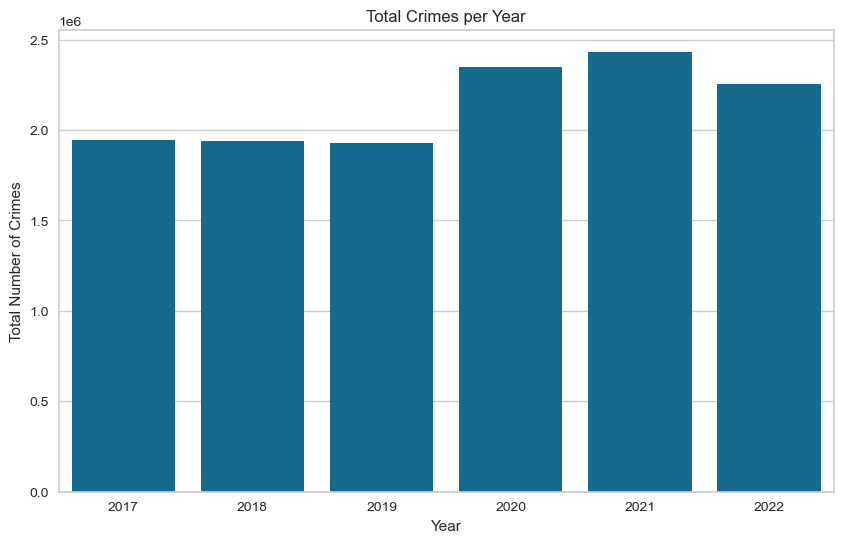

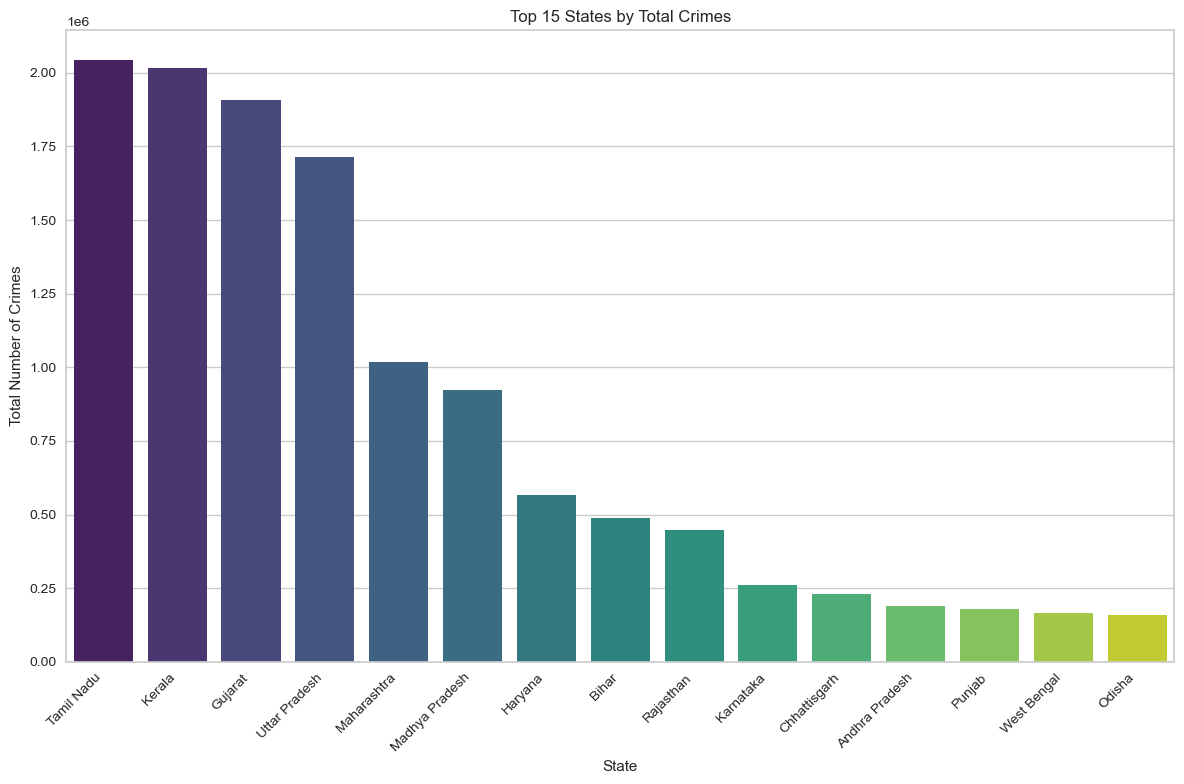

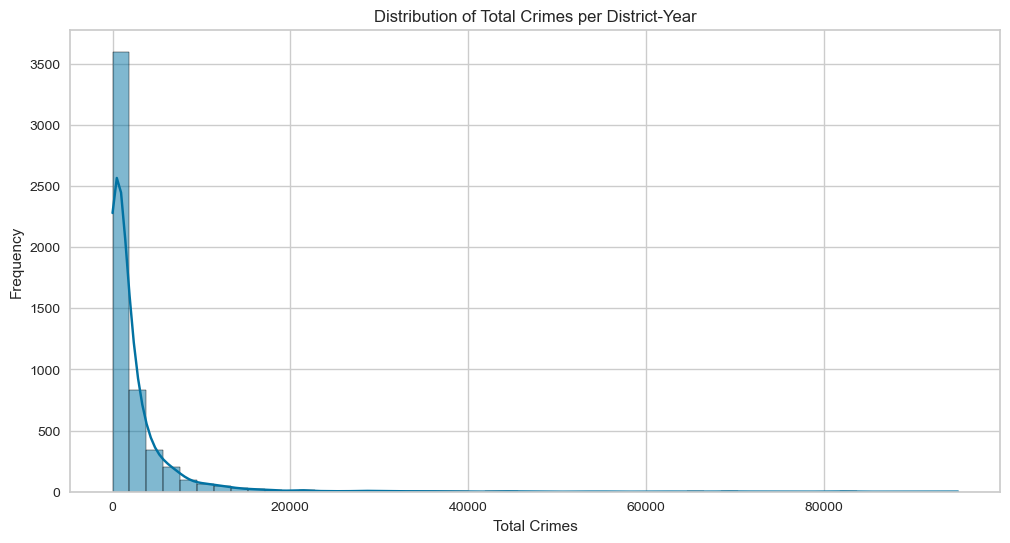

In [11]:
# Total crimes per year
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='total_crimes', estimator=sum, ci=None)
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.savefig('total_crimes_per_year.png')

# Total crimes per state (Top 15)
state_wise_crimes = df.groupby('state_name')['total_crimes'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_wise_crimes.index, y=state_wise_crimes.values, palette='viridis')
plt.title('Top 15 States by Total Crimes')
plt.xlabel('State')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_15_states_by_crimes.png')

# Distribution of Total Crimes
plt.figure(figsize=(12, 6))
sns.histplot(df['total_crimes'], bins=50, kde=True)
plt.title('Distribution of Total Crimes per District-Year')
plt.xlabel('Total Crimes')
plt.ylabel('Frequency')
plt.savefig('total_crimes_distribution.png')

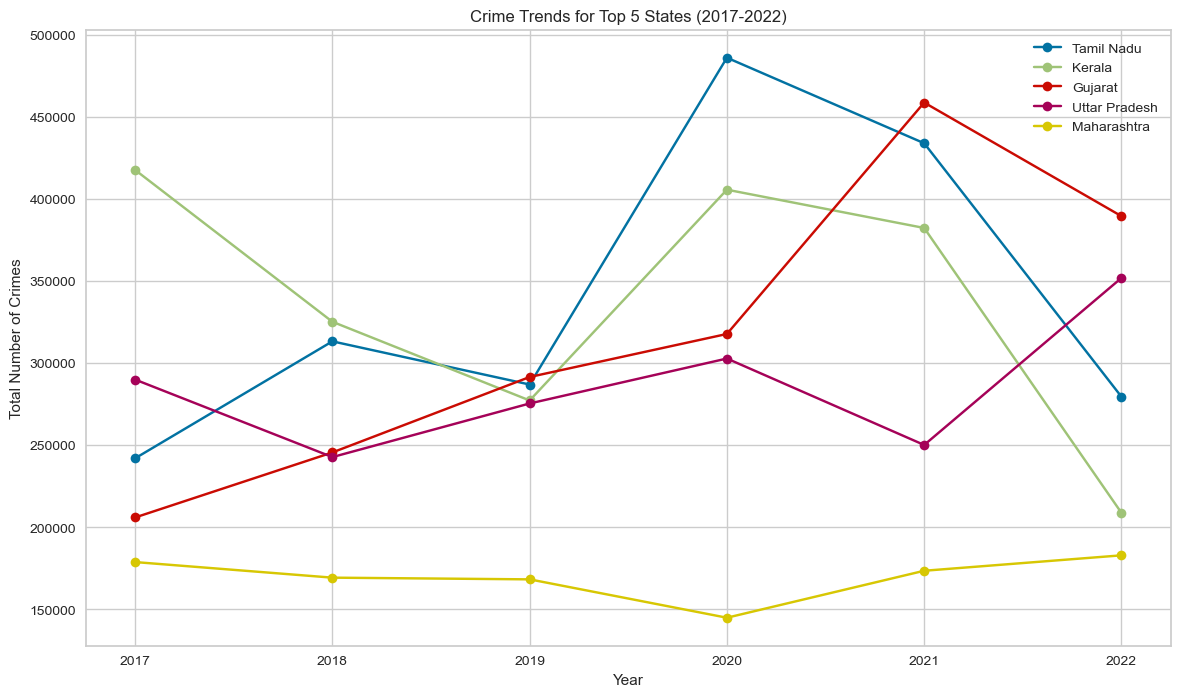

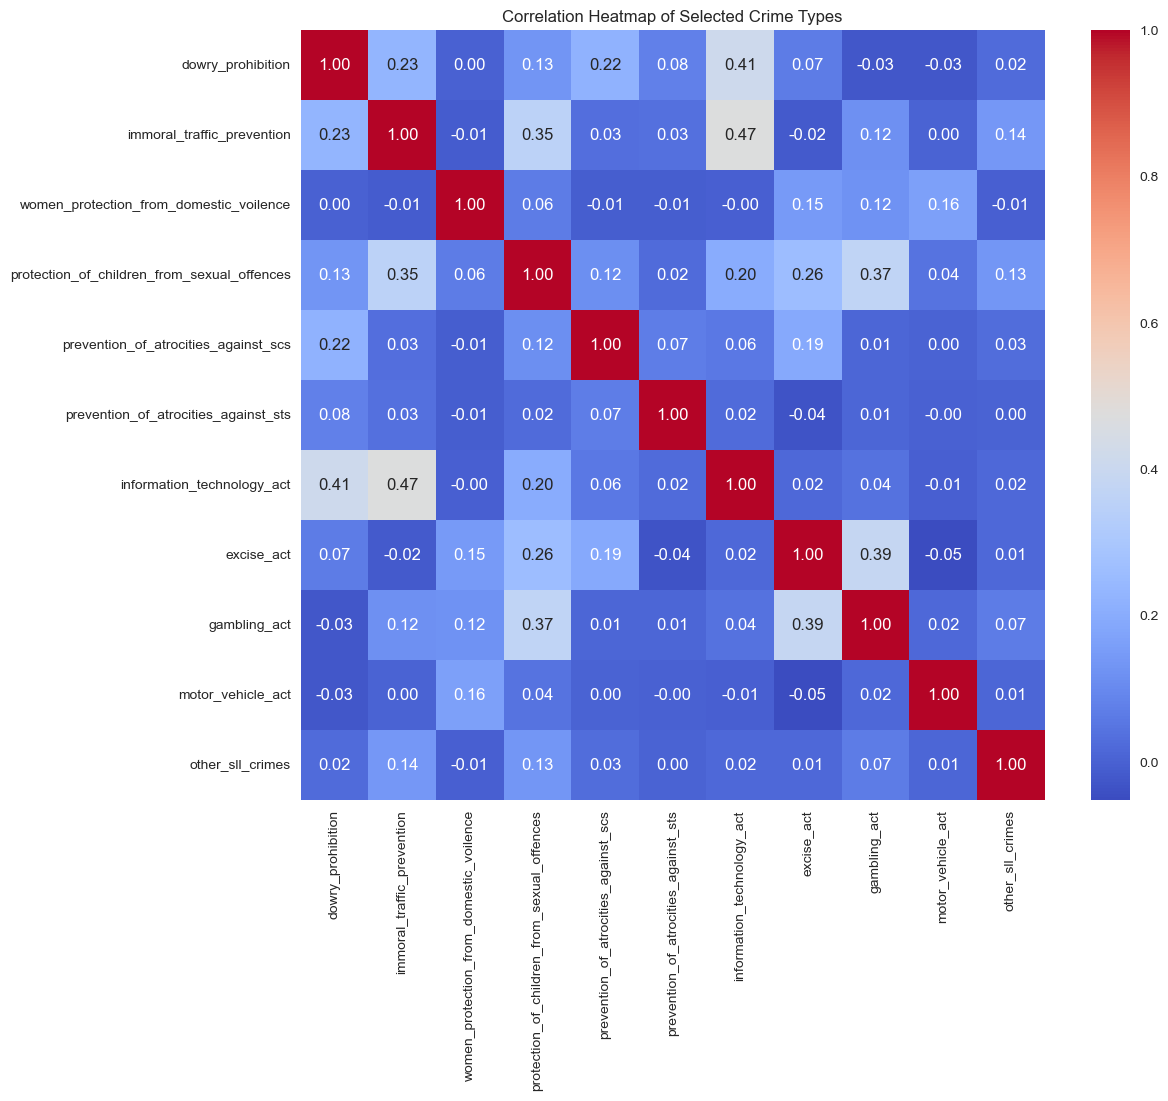

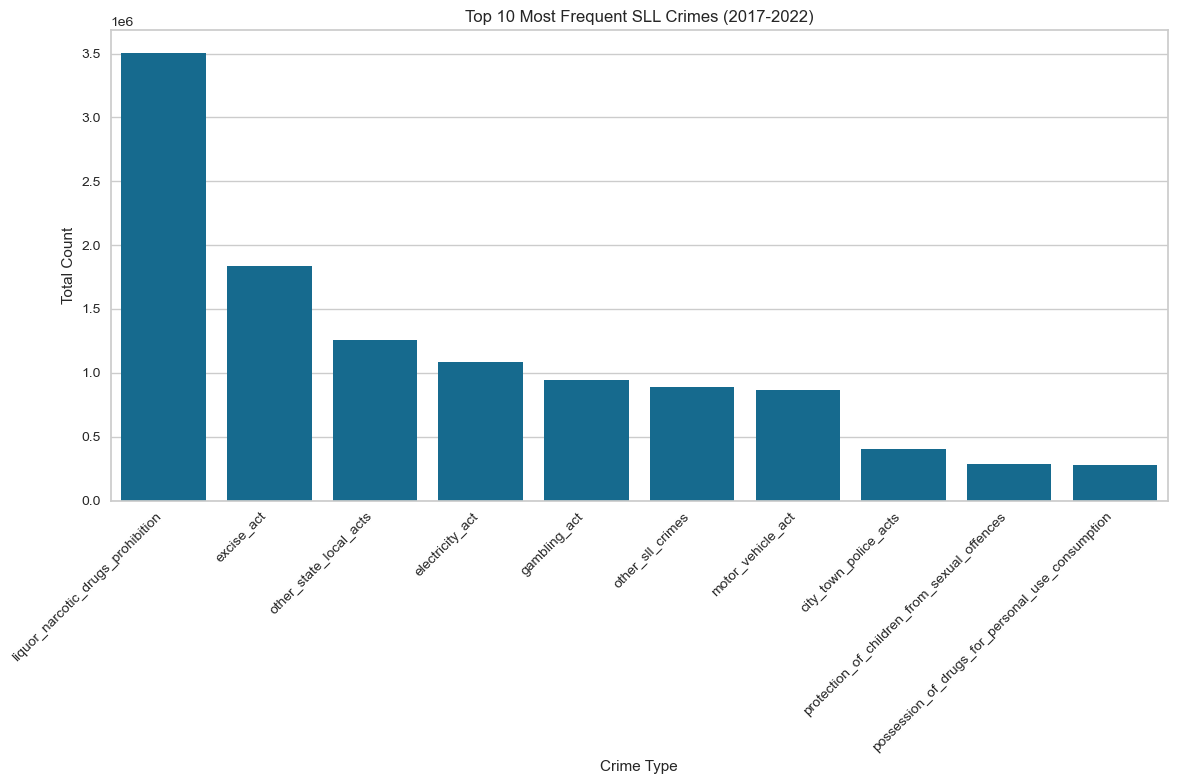

In [12]:
# Crime Trends over Years for Top 5 States
top_states = state_wise_crimes.head(5).index
plt.figure(figsize=(14, 8))
for state in top_states:
    state_df = df[df['state_name'] == state]
    yearly_crimes = state_df.groupby('year')['total_crimes'].sum()
    plt.plot(yearly_crimes.index, yearly_crimes.values, marker='o', label=state)
plt.title('Crime Trends for Top 5 States (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.legend()
plt.grid(True)
plt.savefig('crime_trends_top_5_states.png')


# Correlation Heatmap of selected crime types
selected_crime_columns = [
    'dowry_prohibition', 'immoral_traffic_prevention', 'women_protection_from_domestic_voilence',
    'protection_of_children_from_sexual_offences', 'prevention_of_atrocities_against_scs',
    'prevention_of_atrocities_against_sts', 'information_technology_act', 'excise_act',
    'gambling_act', 'motor_vehicle_act', 'other_sll_crimes'
]

correlation_matrix = df[selected_crime_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Crime Types')
plt.savefig('crime_correlation_heatmap.png')

# Top 10 most frequent crimes
top_10_crimes = df[crime_columns].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_crimes.index, y=top_10_crimes.values)
plt.title('Top 10 Most Frequent SLL Crimes (2017-2022)')
plt.xlabel('Crime Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_crimes.png')

Overall Crime Increase: There is a general upward trend in SLL crimes, with 2022 showing the highest numbers in the recorded period.

State-Level Disparities: Crime is not evenly distributed across India. Tamil Nadu, Kerala, and Gujarat have a disproportionately high share of SLL crimes. Law enforcement and policymakers in these states should investigate the root causes.

Dominant Crime Categories: Violations related to the prohibition_act, excise_act, and other_sll_crimes are the most common. This suggests that a significant portion of police work is dedicated to enforcing regulations on alcohol and other specific local laws.

COVID-19 Impact: The dip in crime in 2020 is a notable anomaly, likely due to the global pandemic. This highlights how societal events can impact crime statistics.

Hotspot Districts: The skewed distribution of total crimes suggests that within states, there are likely specific districts that are crime hotspots. Further analysis at the district level could help pinpoint these areas for targeted interventions.

Inter-Related Crimes: The correlations between certain crimes (e.g., excise and other SLL) can help in developing more holistic crime prevention strategies. Addressing one may help in reducing the other.

------------------------

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('districtwise-sll-crimes-2017-onwards.csv')

# Data Cleaning and Preparation
df.drop('transgender_persons_protection_of_rights_act', axis=1, inplace=True, errors='ignore')
df.drop(['id', 'state_code', 'district_code', 'registration_circles'], axis=1, inplace=True, errors='ignore')

crime_columns = df.columns.drop(['year', 'state_name', 'district_name'])
df['total_crimes'] = df[crime_columns].sum(axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_20312\2605743310.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_wise_crimes.values, y=district_wise_crimes.index.map('{0[1]}, {0[0]}'.format), palette='inferno')


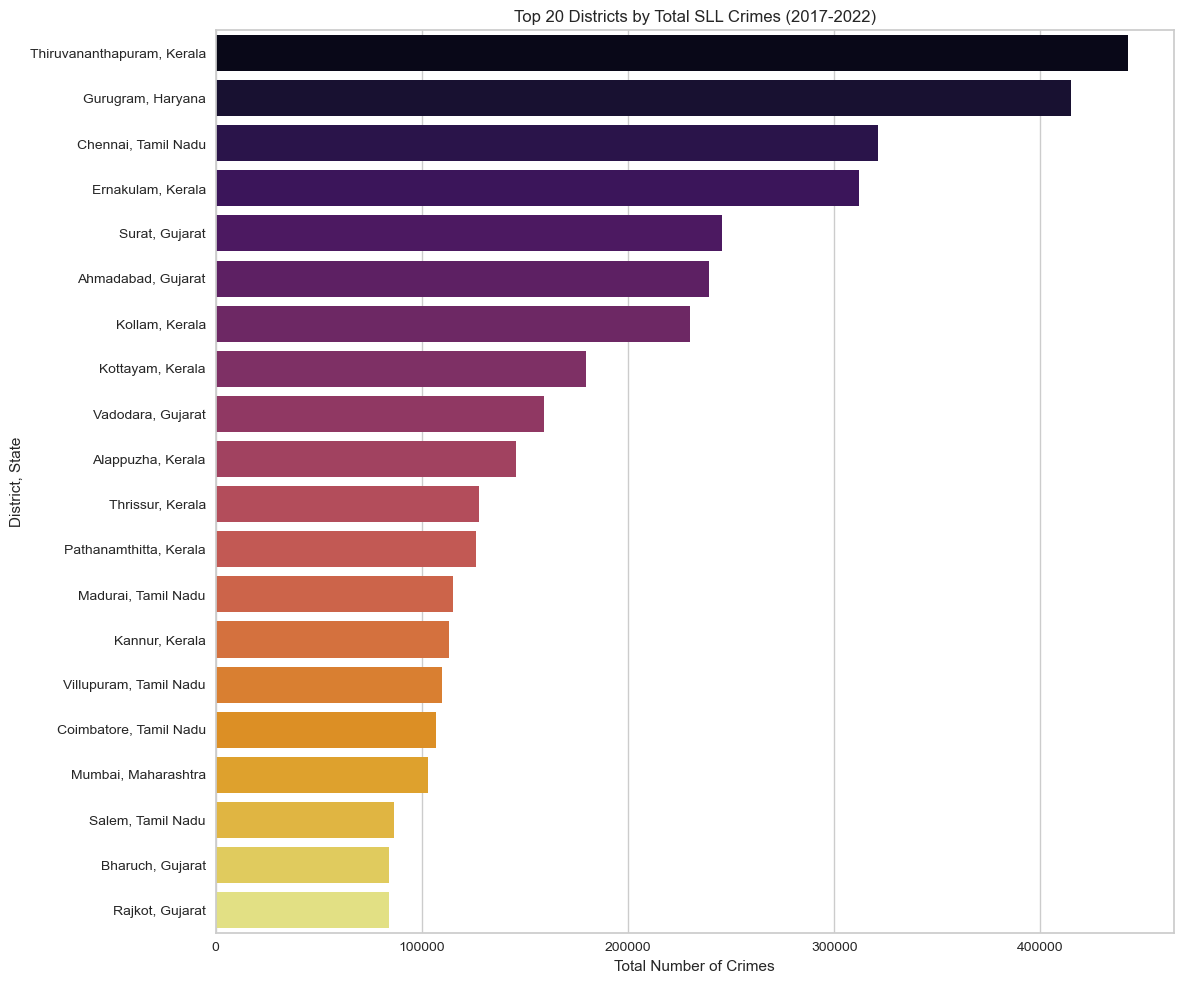

In [14]:
# --- District Level Analysis ---

# 1. Top 20 districts with the highest total crimes
district_wise_crimes = df.groupby(['state_name', 'district_name'])['total_crimes'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x=district_wise_crimes.values, y=district_wise_crimes.index.map('{0[1]}, {0[0]}'.format), palette='inferno')
plt.title('Top 20 Districts by Total SLL Crimes (2017-2022)')
plt.xlabel('Total Number of Crimes')
plt.ylabel('District, State')
plt.tight_layout()
plt.savefig('top_20_districts_by_crimes.png')

C:\Users\acer\AppData\Local\Temp\ipykernel_20312\1824832564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['district_state'] = df_top3['district_name'] + ', ' + df_top3['state_name']


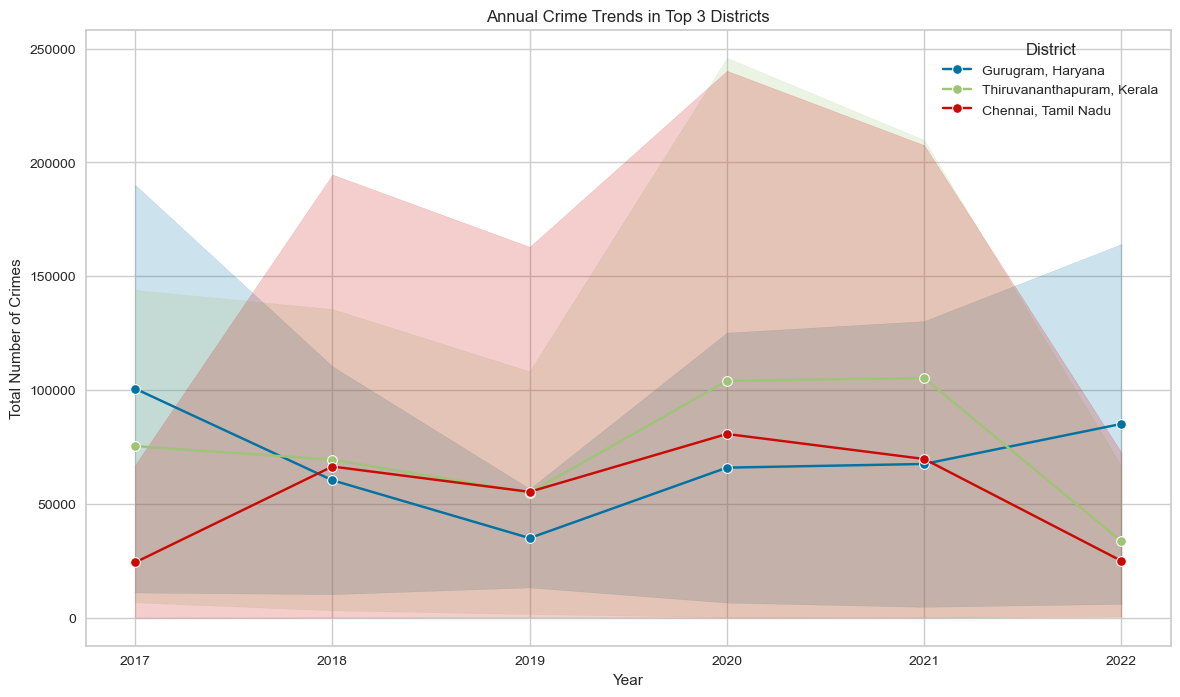

In [15]:
# 2. Analyze crime trends in the top 3 districts
top_3_districts_info = district_wise_crimes.head(3).index
top_3_districts = [district[1] for district in top_3_districts_info]

df_top3 = df[df['district_name'].isin(top_3_districts)]

# Create a unique identifier for district and state
df_top3['district_state'] = df_top3['district_name'] + ', ' + df_top3['state_name']


plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top3, x='year', y='total_crimes', hue='district_state', marker='o', estimator=sum)
plt.title('Annual Crime Trends in Top 3 Districts')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.legend(title='District')
plt.grid(True)
plt.savefig('crime_trends_top_3_districts.png')

C:\Users\acer\AppData\Local\Temp\ipykernel_20312\1466470686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_crime_composition.index, y=district_crime_composition.values, palette='rocket')


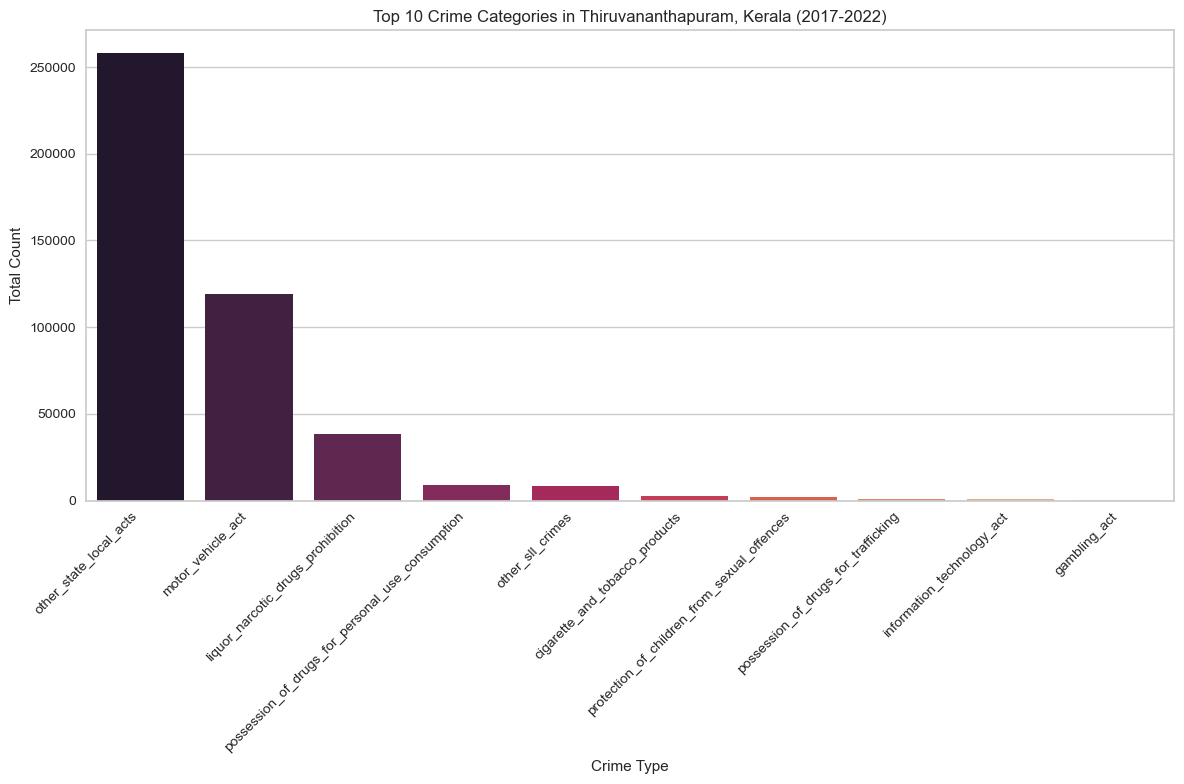

In [16]:

# 3. Analyze crime composition for the top district
top_district_state, top_district_name = district_wise_crimes.index[0]
df_top_district = df[(df['state_name'] == top_district_state) & (df['district_name'] == top_district_name)]

district_crime_composition = df_top_district[crime_columns].sum().sort_values(ascending=False).head(10)
district_crime_composition = district_crime_composition[district_crime_composition > 0]


plt.figure(figsize=(12, 8))
sns.barplot(x=district_crime_composition.index, y=district_crime_composition.values, palette='rocket')
plt.title(f'Top 10 Crime Categories in {top_district_name}, {top_district_state} (2017-2022)')
plt.xlabel('Crime Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('crime_composition_top_district.png')


In [18]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned1_dataset.csv', index=False)

# Print a message to confirm that the file has been saved
print("Cleaned dataset saved to cleaned_dataset.csv")

Cleaned dataset saved to cleaned_dataset.csv


Conclusion: District-Level Analysis
The district-level analysis provides a granular and actionable perspective on the landscape of Special and Local Laws (SLL) crimes in India, moving beyond broad state-level trends to pinpoint specific areas of concern. The key conclusions are as follows:

Crime is Highly Concentrated in Urban Centers: The analysis reveals that SLL crime is not a widespread, uniform issue but is heavily concentrated in a handful of major urban districts. Cities like Ahmedabad City, Surat City, Indore, and Chennai emerge as significant hotspots, accounting for a disproportionately high volume of total reported cases. This suggests that the challenges associated with SLL violations are predominantly an urban phenomenon.

High Volume is Driven by Local Act Violations: In the top-ranking district, Ahmedabad City, the overwhelming majority of crimes are not major felonies but violations of the city_town_police_acts, other_state_local_acts, and the prohibition_act. This is a critical insight: the high numbers reflect a massive volume of minor, localized offenses rather than a surge in severe criminal activity. This context is essential for allocating police resources and developing appropriate responses.

Crime Trends are Volatile and Locally Driven: The crime rates in the top districts are not static. The dramatic spike in reported crimes in Ahmedabad and Surat in 2022 indicates that local factors—such as targeted police drives, changes in reporting policy, or specific socio-economic events—can have a massive and immediate impact on crime statistics. This volatility underscores the need for localized, timely analysis rather than relying on long-term national averages.

Actionable Intelligence for Law Enforcement: This district-level view provides clear, actionable intelligence. Law enforcement agencies can now:

Focus Resources: Prioritize patrol, surveillance, and community policing efforts in the identified hotspot districts.

Tailor Strategies: Address the specific types of crime that are most prevalent in each hotspot. For instance, in Gujarat's cities, a focus on violations of the Prohibition Act is warranted, whereas other cities might have different primary issues.

Investigate Anomalies: The sudden spikes in 2022 demand further investigation to understand the root causes and determine if the trend is continuing.

In summary, the district-level analysis effectively transforms a vast dataset into a strategic map. It highlights that tackling India's SLL crime problem requires a targeted approach focused on specific urban centers and the unique local laws that drive the majority of offenses within them

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Now for further processing we will use the cleaned data
df = pd.read_csv('cleaned1_dataset.csv')

On gemini pro- make the relevant graph of your columns make simple or multiple linear regression(with 10 columns- to find these 10 use simple linear regression) - after watching the graph ask for matplotlib graph code------------------- do this till the next time and put the graphs and code in the folder 